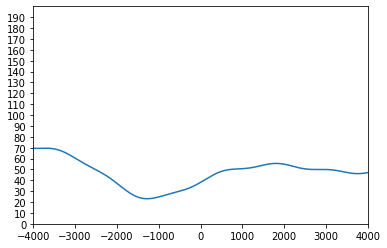

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

def _get_random_variation(rstart, rend):
    var = rstart + (rend-rstart)*np.random.random(1)
    return var
def eval_fun(x):
    y_points = curve_slope*x + curve_height  + wave_size*np.sin((x-wave_start)/curve_waviness) + \
       (wave_size/1.5)*np.sin((x-(wave_start))/(curve_waviness/2)) + \
       (wave_size/1.5)*np.sin((x-(wave_start))/(curve_waviness/4))

    norm = (1/(sig*np.sqrt(2*np.pi)))*np.exp((-1*(x-mu)**2)/(2*sig**2))
    y_points = curve_slope*x + curve_height + y_points + norm * scale_fact * direction
    return y_points

curve_slope = _get_random_variation(-0.004, -0.001)
curve_height = 30
wave_size = 2
wave_start = _get_random_variation(0, 10000)
curve_waviness = _get_random_variation(500, 1400)
sig = _get_random_variation(300, 1200)
mu = _get_random_variation(-2500, 2500)
scale_fact = 100*sig
direction = np.random.choice([-1,1])

x = np.linspace(-4000, 4000, 20000)
real_y = eval_fun(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-4000,4000])
ax.set_yticks(np.arange(0,200,10))
ax.set_ylim([0,200])

ax.plot(x,real_y)

plt.show()





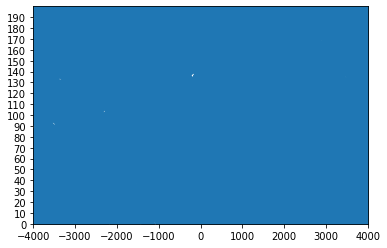

In [12]:

def generative(x_vals):
    y_vals = np.zeros(len(x_vals))
    for i, x_val in enumerate(x_vals):
        y_val = np.random.random(1)*200
        real_y_val = eval_fun(x_val)
        while np.abs(y_val - real_y_val) <= 0.5:
            y_val = np.random.random(1)*200
        y_vals[i] = y_val
        
    return y_vals

fake_y = generative(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-4000,4000])
ax.set_yticks(np.arange(0,200,10))
ax.set_ylim([0,200])

ax.scatter(x,fake_y)

plt.show()


In [13]:
len(fake_y), len(real_y), len(x)

(20000, 20000, 20000)

In [14]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

# def discriminate(y_label):
X = np.zeros((len(real_y)+len(fake_y),2)) #[[0, 0], [1, 1]]

X[0:len(real_y),0] = x
X[0:len(real_y),1] = real_y

X[len(real_y):,0] = x
X[len(real_y):,1] = fake_y

y = np.zeros(len(real_y)+len(fake_y))
y[0:len(real_y)] = 1.0
y[len(real_y):] = 0.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

    

Accuracy: 0.7808333333333334
Precision: 0.6958578637510513
Recall: 1.0
F1: 0.8206558799826421
